In [102]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [103]:
pip install bs4

Note: you may need to restart the kernel to use updated packages.


In [104]:
import pandas as pd
import requests
import time
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
from wordcloud import WordCloud

In [105]:
url = 'https://directsupply.wd5.myworkdayjobs.com/direct-supply-careers/job/Milwaukee-WI/Senior-Data-Scientist_REQ-2023-1250'

page = requests.get(url)
page

<Response [200]>

In [106]:
page.status_code

200

In [107]:
page.content

b'<!DOCTYPE html>\n<html lang="en-US">\n<head>\n\n    <!-- Application Properties -->\n    <meta http-equiv="X-UA-Compatible" content="chrome=1;IE=EDGE"/>\n    <meta http-equiv="content-type" content="text/html; charset=UTF-8">\n    <meta name="viewport" content="width=device-width, initial-scale=1.0, maximum-scale=2.0">\n\n    <link rel="canonical" href="https://directsupply.wd5.myworkdayjobs.com/en-US/direct-supply-careers/job/Senior-Data-Scientist_REQ-2023-1250" />\n\n    <!-- OpenGraph Tags -->\n    <meta name="title" property="og:title" content="Senior Data Scientist">\n    <meta name="description" property="og:description" content="Direct Supply, Inc. is currently seeking a qualified candidate to serve as a Senior Data Scientist to build Artificial Intelligence and Machine Learning (AI/ML) solutions to solve complex business problems in Milwaukee, WI. Duties Include: Understand business problems, validate requirements, ensure scope of request and translate business problems into 

In [108]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(page.content)

In [109]:
print(soup.prettify())

<!DOCTYPE html>
<html lang="en-US">
 <head>
  <!-- Application Properties -->
  <meta content="chrome=1;IE=EDGE" http-equiv="X-UA-Compatible"/>
  <meta content="text/html; charset=utf-8" http-equiv="content-type"/>
  <meta content="width=device-width, initial-scale=1.0, maximum-scale=2.0" name="viewport"/>
  <link href="https://directsupply.wd5.myworkdayjobs.com/en-US/direct-supply-careers/job/Senior-Data-Scientist_REQ-2023-1250" rel="canonical"/>
  <!-- OpenGraph Tags -->
  <meta content="Senior Data Scientist" name="title" property="og:title"/>
  <meta content="Direct Supply, Inc. is currently seeking a qualified candidate to serve as a Senior Data Scientist to build Artificial Intelligence and Machine Learning (AI/ML) solutions to solve complex business problems in Milwaukee, WI. Duties Include: Understand business problems, validate requirements, ensure scope of request and translate business problems into data science problem statements; Provide consultative statistical inference,

In [110]:
list(soup.children)

['html',
 <html lang="en-US">
 <head>
 <!-- Application Properties -->
 <meta content="chrome=1;IE=EDGE" http-equiv="X-UA-Compatible"/>
 <meta content="text/html; charset=utf-8" http-equiv="content-type"/>
 <meta content="width=device-width, initial-scale=1.0, maximum-scale=2.0" name="viewport"/>
 <link href="https://directsupply.wd5.myworkdayjobs.com/en-US/direct-supply-careers/job/Senior-Data-Scientist_REQ-2023-1250" rel="canonical"/>
 <!-- OpenGraph Tags -->
 <meta content="Senior Data Scientist" name="title" property="og:title"/>
 <meta content="Direct Supply, Inc. is currently seeking a qualified candidate to serve as a Senior Data Scientist to build Artificial Intelligence and Machine Learning (AI/ML) solutions to solve complex business problems in Milwaukee, WI. Duties Include: Understand business problems, validate requirements, ensure scope of request and translate business problems into data science problem statements; Provide consultative statistical inference, presents find

In [111]:
[type(item) for item in list(soup.children)]

[bs4.element.Doctype, bs4.element.Tag]

In [119]:
description = soup.findAll("meta", {"name" : "description"})[0]['content']

In [120]:
print(description)

Direct Supply, Inc. is currently seeking a qualified candidate to serve as a Senior Data Scientist to build Artificial Intelligence and Machine Learning (AI/ML) solutions to solve complex business problems in Milwaukee, WI. Duties Include: Understand business problems, validate requirements, ensure scope of request and translate business problems into data science problem statements; Provide consultative statistical inference, presents findings and simplify complex statistical analysis for broad understanding to senior leadership and business leaders to understand the short- and long-term effects of applying ML solutions to solve business problems while proposing ways to measure and mitigate potential issues; Implement and support proprietary AI/ML solutions built by the Direct Supply Research Data Scientists, which includes troubleshooting problems, retraining models, and analyzing and updating data pipelines; Create and maintain AI/ML solutions on a variety of programming platforms s

In [121]:
words = description.split()
print(words)

['Direct', 'Supply,', 'Inc.', 'is', 'currently', 'seeking', 'a', 'qualified', 'candidate', 'to', 'serve', 'as', 'a', 'Senior', 'Data', 'Scientist', 'to', 'build', 'Artificial', 'Intelligence', 'and', 'Machine', 'Learning', '(AI/ML)', 'solutions', 'to', 'solve', 'complex', 'business', 'problems', 'in', 'Milwaukee,', 'WI.', 'Duties', 'Include:', 'Understand', 'business', 'problems,', 'validate', 'requirements,', 'ensure', 'scope', 'of', 'request', 'and', 'translate', 'business', 'problems', 'into', 'data', 'science', 'problem', 'statements;', 'Provide', 'consultative', 'statistical', 'inference,', 'presents', 'findings', 'and', 'simplify', 'complex', 'statistical', 'analysis', 'for', 'broad', 'understanding', 'to', 'senior', 'leadership', 'and', 'business', 'leaders', 'to', 'understand', 'the', 'short-', 'and', 'long-term', 'effects', 'of', 'applying', 'ML', 'solutions', 'to', 'solve', 'business', 'problems', 'while', 'proposing', 'ways', 'to', 'measure', 'and', 'mitigate', 'potential', 

In [124]:
import string
table = str.maketrans('','',string.punctuation)
stripped = [w.translate(table) for w in words]
print(stripped)

['Direct', 'Supply', 'Inc', 'is', 'currently', 'seeking', 'a', 'qualified', 'candidate', 'to', 'serve', 'as', 'a', 'Senior', 'Data', 'Scientist', 'to', 'build', 'Artificial', 'Intelligence', 'and', 'Machine', 'Learning', 'AIML', 'solutions', 'to', 'solve', 'complex', 'business', 'problems', 'in', 'Milwaukee', 'WI', 'Duties', 'Include', 'Understand', 'business', 'problems', 'validate', 'requirements', 'ensure', 'scope', 'of', 'request', 'and', 'translate', 'business', 'problems', 'into', 'data', 'science', 'problem', 'statements', 'Provide', 'consultative', 'statistical', 'inference', 'presents', 'findings', 'and', 'simplify', 'complex', 'statistical', 'analysis', 'for', 'broad', 'understanding', 'to', 'senior', 'leadership', 'and', 'business', 'leaders', 'to', 'understand', 'the', 'short', 'and', 'longterm', 'effects', 'of', 'applying', 'ML', 'solutions', 'to', 'solve', 'business', 'problems', 'while', 'proposing', 'ways', 'to', 'measure', 'and', 'mitigate', 'potential', 'issues', 'Imp

In [127]:
lowered = [w.lower() for w in stripped]

In [128]:
words = [word for word in lowered if word.isalpha()]

In [130]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [133]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hicks\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [134]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
words = [w for w in words if not w in stop_words]
print(words)

['direct', 'supply', 'inc', 'currently', 'seeking', 'qualified', 'candidate', 'serve', 'senior', 'data', 'scientist', 'build', 'artificial', 'intelligence', 'machine', 'learning', 'aiml', 'solutions', 'solve', 'complex', 'business', 'problems', 'milwaukee', 'wi', 'duties', 'include', 'understand', 'business', 'problems', 'validate', 'requirements', 'ensure', 'scope', 'request', 'translate', 'business', 'problems', 'data', 'science', 'problem', 'statements', 'provide', 'consultative', 'statistical', 'inference', 'presents', 'findings', 'simplify', 'complex', 'statistical', 'analysis', 'broad', 'understanding', 'senior', 'leadership', 'business', 'leaders', 'understand', 'short', 'longterm', 'effects', 'applying', 'ml', 'solutions', 'solve', 'business', 'problems', 'proposing', 'ways', 'measure', 'mitigate', 'potential', 'issues', 'implement', 'support', 'proprietary', 'aiml', 'solutions', 'built', 'direct', 'supply', 'research', 'data', 'scientists', 'includes', 'troubleshooting', 'prob

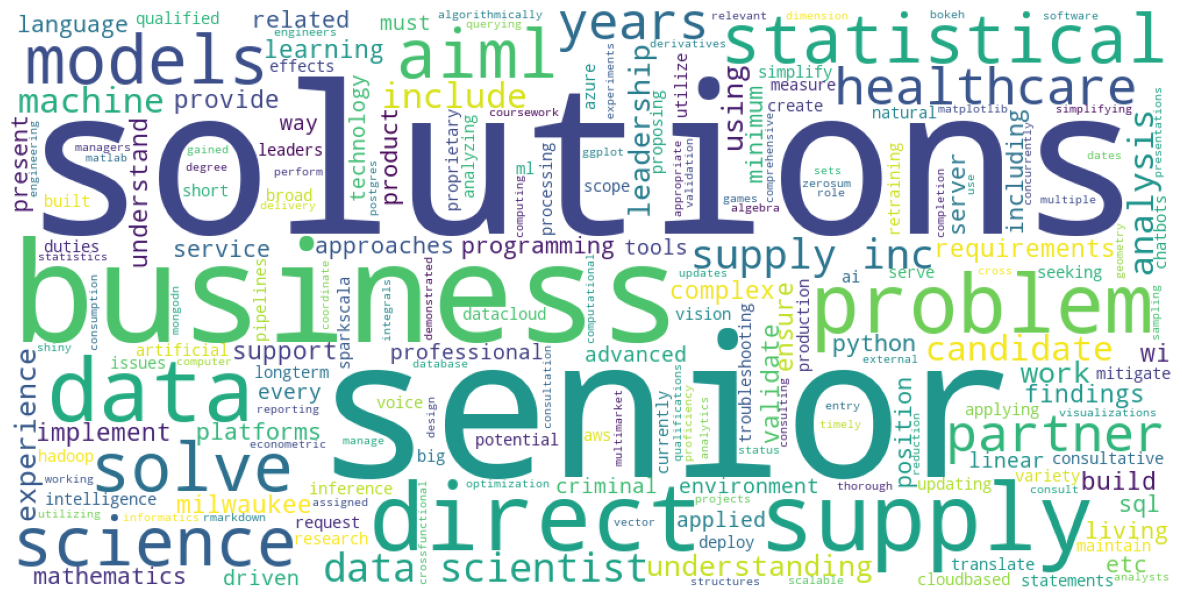

In [139]:
unique_string=(" ").join(words)
wordcloud = WordCloud(width = 1000, height = 500, background_color = "white").generate(unique_string)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("your_file_name"+".png", bbox_inches='tight')
plt.show()
plt.close()